## Figures for BglB thermal stability paper, and summary statistics and those that don't fit anywhere else 

+ unique positions list 
+ PyMOL commands for making a figure showing all the positions mutated 
+ list of mutants that don't express 


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt 
import pandas
import numpy as np 
from numpy import log10, log2, inf, nan, arange, linspace 

In [10]:
df = pandas.read_csv( '../data_set/targets.csv', index_col=0 )

In [11]:
df.describe()

/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,sequence_pos,expression,tm,k,err_tm,err_k,kcat,err_kcat,km,err_km,...,ki,ki_percent_err,ki_err,gel_number,target_expression,target_tm,target_kcat,target_km,target_kcatkm,conserved
count,128.000000,129.000000,79.000000,79.000000,79.000000,79.000000,76.000000,76.000000,76.000000,76.000000,...,8.000000,8.000000,8.000000,128.000000,129.000000,79.000000,76.000000,76.000000,79.000000,128.000000
mean,241.531250,0.713178,39.463291,-0.838354,0.268734,0.156456,539.436842,13.068553,11.117895,1.000526,...,227.772500,35.595000,111.186250,10.390625,0.713178,-0.466709,-0.748108,-0.172267,-1.060987,0.499220
std,122.181737,0.454041,1.645206,0.374917,0.156683,0.156140,1263.384644,31.362360,13.437381,1.186895,...,167.270111,22.658287,165.916493,5.749679,0.454041,1.645206,0.907249,0.390723,1.241569,0.355953
min,12.000000,0.000000,34.910000,-1.730000,0.040000,0.020000,0.200000,0.010000,0.400000,0.020000,...,95.240000,13.700000,13.050000,1.000000,0.000000,-5.020000,-3.643453,-1.251297,-4.199157,0.001263
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
max,423.000000,1.000000,45.990000,-0.260000,0.790000,0.860000,11011.000000,258.000000,89.180000,5.890000,...,590.710000,86.560000,511.320000,21.000000,1.000000,6.060000,1.097344,1.096910,0.955350,1.000000


In [12]:
df.sample( 3 )

,sequence_pos,expression,tm,k,err_tm,err_k,kcat,err_kcat,km,err_km,...,ki,ki_percent_err,ki_err,gel_number,target_expression,target_tm,target_kcat,target_km,target_kcatkm,conserved
mutant,,,,,,,,,,,,,,,,,,,,,
I300N,300.0,1,38.56,-0.42,0.54,0.08,693.0,13.0,4.48,0.32,...,NaN,NaN,NaN,7.0,1,-1.37,-0.103749,0.047692,-0.050969,0.128006
W325C,325.0,1,39.30,-1.03,0.15,0.14,10.0,1.0,4.18,0.53,...,159.19,34.38,54.73,12.0,1,-0.63,-1.944483,0.077794,-1.842088,0.856407
Q19A,19.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.0,1,NaN,NaN,NaN,NaN,0.990285


### Number of positions mutated, PyMOL selection, list of not expressed

Number of sequence positions mutated:

In [13]:
len( df.sequence_pos.unique() ) 

68

How could you quickly select them in PyMOL? You could use: 

In [14]:
s = '+'.join( [ i for i in df.sequence_pos.dropna().astype( int ).astype( str ) ] ) 
print( 'select all_mutants, resi', s )

select all_mutants, resi 12+14+15+16+16+17+17+18+19+19+19+19+32+34+52+72+76+91+101+119+119+119+120+120+120+121+154+163+163+163+163+163+164+164+164+166+167+167+171+171+175+177+177+177+178+178+192+218+220+220+220+220+220+221+222+222+222+222+222+222+236+240+240+240+240+244+244+249+261+293+293+293+293+293+294+294+294+295+295+296+296+298+300+313+315+315+323+323+325+325+325+325+325+325+329+331+341+343+352+353+354+355+358+362+373+379+379+399+399+399+399+399+400+403+404+404+406+406+407+407+407+407+407+407+409+415+415+423


List of mutants that do not express:

In [15]:
df[( df.expression == 0 )].index

Index(['G12N', 'S16N', 'Q19P', 'S32L', 'W34A', 'R76A', 'H119E', 'W120A',
       'D121F', 'N163E', 'N163K', 'E164G', 'E164R', 'Y166P', 'H178R', 'A236E',
       'R240E', 'A249E', 'M261D', 'N293D', 'N293K', 'Y294L', 'T296A', 'T296E',
       'H315N', 'M323K', 'W325G', 'P329N', 'F343S', 'G355A', 'H379T', 'D403A',
       'W407G', 'W407K', 'W407Q', 'W407R', 'W407Y'],
      dtype='object', name='mutant')

### How many with a T$_m$ within 1 degree of WT?

In [16]:
within = lower = higher = 0
for tm in df.tm:
    if abs( 39.9 - tm ) < 1:
        within += 1 
    elif tm > ( 39.9 + 1 ):
        higher += 1
    elif tm > 0 and tm < 38.9:
        lower += 1
        
print( within, lower, higher ) 

43 26 10


In [10]:
# to and from G mutants, and whether expressed 
for nm in df.index:
    if nm[0] == 'G' or nm[-1] == 'G':
        print( nm, df.loc[ nm ].expression ) 

G12N 0.0
V52G 1.0
E164G 0.0
N220G 1.0
Y295G 1.0
W325G 0.0
G355A 0.0
W399G 1.0
W407G 0.0


# Conservation along BglB sequence 

Alignment of 1554 Pfam sequences that we trimmed by hand to have catalytic residues as in previous paper 



In [11]:
dat = pandas.read_csv( 'old_stuff/alignment/logo-data-bagel-aligned.txt', sep='\s+' ) 
dat['sequence_pos'] = dat.index + 1 
print( len( dat ) )

aas = [ u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'V', u'W', u'Y' ]

clean_dat = dat[ aas ].copy()
clean_dat.index = dat.amino_acid 

percents = []
for idx, row in clean_dat.iterrows():
    percents.append( row[ idx.upper() ].astype( float ) / row.sum()  )
    
clean_dat['percents'] = percents
clean_dat['sequence_pos'] = range( 1, 446 ) 
clean_dat[ 'entropy' ] = dat.Entropy

print( len( clean_dat ) )
clean_dat.sample( 5 ) 

445
445


,A,C,D,E,F,G,H,I,K,L,...,Q,R,S,T,V,W,Y,percents,sequence_pos,entropy
amino_acid,,,,,,,,,,,,,,,,,,,,,
d,78,0,957,86,0,11,6,1,75,17,...,36,30,29,32,2,0,1,0.604930,104,NaN
d,82,0,138,400,0,37,18,2,296,5,...,107,184,69,118,2,24,8,0.087121,150,NaN
k,109,15,267,285,6,73,87,8,145,3,...,49,170,68,53,24,1,107,0.095269,256,NaN
h,593,164,8,1,41,41,47,40,1,11,...,5,4,255,139,152,1,24,0.029785,74,NaN
p,24,1,0,0,6,0,0,26,0,24,...,0,0,8,13,46,0,0,0.905934,113,NaN


In [12]:
# sorry, the above is a terrible hack

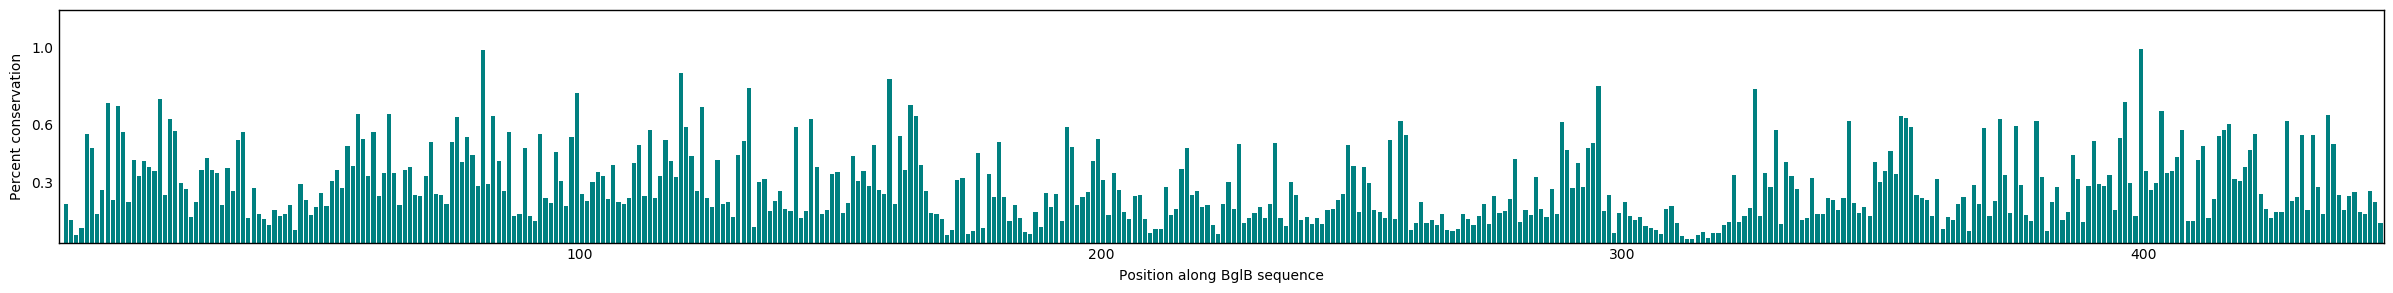

In [13]:
plt.figure( figsize=( 30, 3 ) ) 
plt.bar( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) , lw=0, color='teal', label='Entropy' )

plt.xlim( 0, 446 ); plt.ylim( 0, 1.2 ) 
plt.xticks( [ 100, 200, 300, 400 ] ) 
plt.ylabel( 'Percent conservation' )
plt.xlabel( 'Position along BglB sequence' ) 
plt.tick_params( length=0 ) 
plt.yticks( [ 0.3, .6, 1 ] ) 
#plt.box(0)
plt.show()

In [14]:
# add the percent conserved to our dataframe for use in heat map 

my_percent_conserved = clean_dat[ [ 'sequence_pos', 'percents' ] ]
my_percent_conserved.index = my_percent_conserved.sequence_pos
my_dict = dict( my_percent_conserved.percents ) 

#my_dict

In [15]:
# add the distance from active site to the dataframe 

dist = pandas.read_csv( '../data_sets/reference/distance_from_active_site.csv', index_col='name', usecols=['name', 'distance'], squeeze=True )
df[ 'distance_from_active_site' ] = dist.loc[ df.index ] 

### Heat map qualitative depiction of expression, T<sub>m</sub>, _k_<sub>cat</sub>, K<sub>M</sub>, and _k_<sub>cat</sub>/K<sub>M</sub> 

Heat map style uses a diverging (red/blue) color map to compare the log values relative to wild type

In [16]:
# heat map 

h_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'sequence_pos' ] 
h = df[ h_cols ].copy()

h.tm = h.tm - 39.93 
h.kcat = log10( h.kcat / 880 ) 
h.km = log10( (1/h.km) / (1/5.) )
h.kcatkm = log10( h.kcatkm / 174000 )  
h.expression = h.expression # boolean 
h['conserved'] = h.sequence_pos.map( my_dict )

h.replace( [ -inf ], -5, inplace=True ) # damn son
h = h.sort_values( by='sequence_pos', ascending=True )

# sanity check: what are the WT values after this procedure?  
# should be expression = 1, all others = 0 
print( h.loc[ 'BglB' ] )

expression      1.0
tm              0.0
kcat            0.0
km              0.0
kcatkm          0.0
sequence_pos    NaN
conserved       NaN
Name: BglB, dtype: float64


### Color maps and color bars for legends  

We need color maps for 

|Parameter|Numeric type|Range|Colors|`n_bins`|Bins
|---|---|-----
|protein expression|binary|[0,1]|white-black|2|[0],[1]|
|tm|float|[-6,4]|purple green yellow|5|[-1,1], [1-3], [>3], [-3,-1], [<-3]|
|kcat, km, kcat/km|float|[-5,2]|navy gray gold|?|[-1,1], [-3,-1], [>-3], [1,3], 


In [17]:
# make targets for machine learnig 
#h[ [ 'expression', 'tm', 'kcat', 'km', 'kcatkm' ] ].to_csv( 'targets.csv' ) 

([], <a list of 0 Text yticklabel objects>)

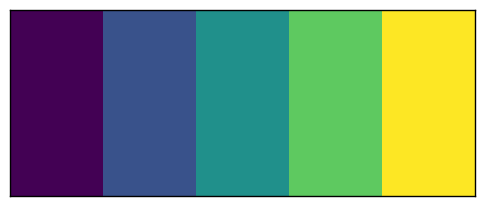

In [18]:
damn_son = np.array( [ arange( -3, 2, 1 ), arange( -3, 2, 1 ), ] )
plt.imshow( damn_son, cmap='viridis', interpolation='none' )
plt.xticks([]); plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

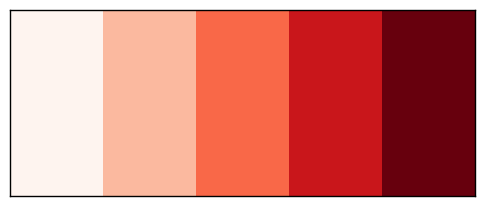

In [19]:

#plt.style.use( 'default' )
damn_son = np.array( [ arange( 1, 100, 20 ), arange( 1, 100, 20 ), ] )
plt.imshow( damn_son, cmap='Reds', interpolation='none' )
plt.xticks([]); plt.yticks([])

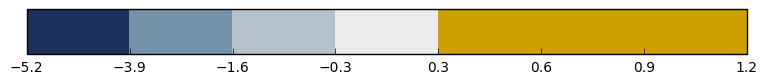

In [20]:
# color map 

from matplotlib import pyplot
import matplotlib as mpl

fig = pyplot.figure(figsize=(8, 3))
ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

cmap = mpl.colors.ListedColormap([
    ( .11, .19, .36 ), # deep blue
    ( .46, .57, .66 ), # medium blue
    ( .71, .76, .80 ), # light blue 
    ( .92, .92, .92 ), # grey 
#   ( .92, .88, .74 ), # light yellow
#   ( .88, .80, .51 ), # medium yellow 
    ( .81, .63, 0. ),  # deep yellow 
    ( .81, .63, 0. ),  # deep yellow 
    ( .81, .63, 0. ),  # deep yellow 
])

cmap.set_over((1., 0., 0.)) # bright red! 
cmap.set_under(( .11, .19, .36 )) # deep blue 

#bounds = [-5.2, -3.9, -2.6, -.3, .3, .6, .9, 1.2 ]
bounds = [-5.2, -3.9, -1.6, -.3, .3, .6, .9, 1.2, ] #2.6, 3.9, 5.2 ]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, ticks=[-5, -4, -2, -3, -1, 0, 1], orientation='horizontal')
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, orientation='horizontal')
pyplot.show()

In [21]:
my_params = { 
    'tm': {
        'cmap': 'viridis', 'vmin': -4, 'vmax': 4 , 
    }, 
    'expression': {
        'cmap': 'Greys', 'vmin': -0.2, 'vmax': 1.2 , 
    }, 
    'kcat': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'km': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'kcatkm': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'conserved': {
        'cmap': 'Reds', 'vmin': 0, 'vmax': 1, 
    }, 
    'distance_from_active_site': {
        'cmap': 'Yellows', 'vmin': 0, 'vmax': 1, 
    }, 
}

#to_plot = enumerate( [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'percent_conserved', 'distance_from_active_site' ] )

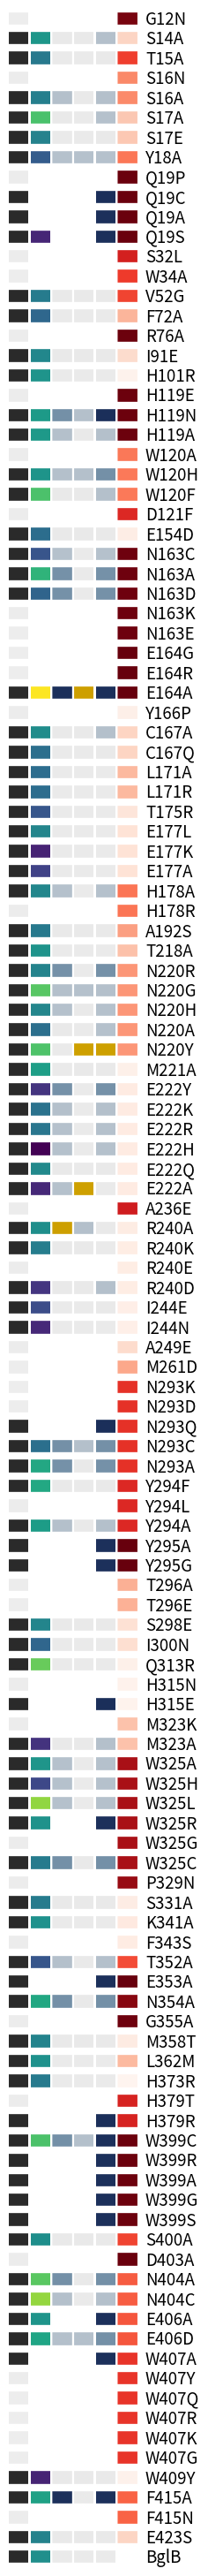

In [22]:
to_plot = enumerate( [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'conserved' ] )

plt.figure( figsize=(22,90) ) 
plt.subplots_adjust( left=1., right=1.1 )

for i, col in to_plot:
    plt.subplot( 1, 9, i+3 ) 
    plt.imshow( h[ [ col ] ], interpolation='none', **my_params[ col ] )
    plt.xticks([]); plt.yticks([]) 
    plt.box( 0 ) 

    # white lines 
    plt.plot( [ -.5, .5 ], [ -0.5, -0.5 ], c='w', lw=6 ) # top line :)  
    for i, r in enumerate( h.index ):
        plt.plot( [ -.5, .5 ], [ i+0.5, i+0.5 ], c='w', lw=6 ) 
        
# this is for padding 
#plt.subplot( 1, 8, 8 )
#plt.box( 0 ) 
        
# mutant labels         
font = { 'fontsize': 15, 'fontname': 'Source Sans Pro', }
for i, r in enumerate( h.index ):
    plt.text( .9, i+0.3, r, fontdict=font )

plt.subplots_adjust(wspace=0.1, hspace=0)
#plt.savefig( 'heatmap_out.png', dpi=200 ) 

### Bar plot style 

using minimalistic bar plots, with a thick band indicating a 2-fold spread around native values. 

In [23]:
# bar plot style 

b_cols = [ 'kcat', 'err_kcat', 'km', 'err_km', 'kcatkm', 'err_kcatkm' ] 
j = df[ b_cols ].copy()
j = log10( j + 1 ) 

In [24]:
j.loc['BglB']

kcat          2.944976
err_kcat      1.041393
km            0.778151
err_km        0.079181
kcatkm        5.240552
err_kcatkm    3.903144
Name: BglB, dtype: float64

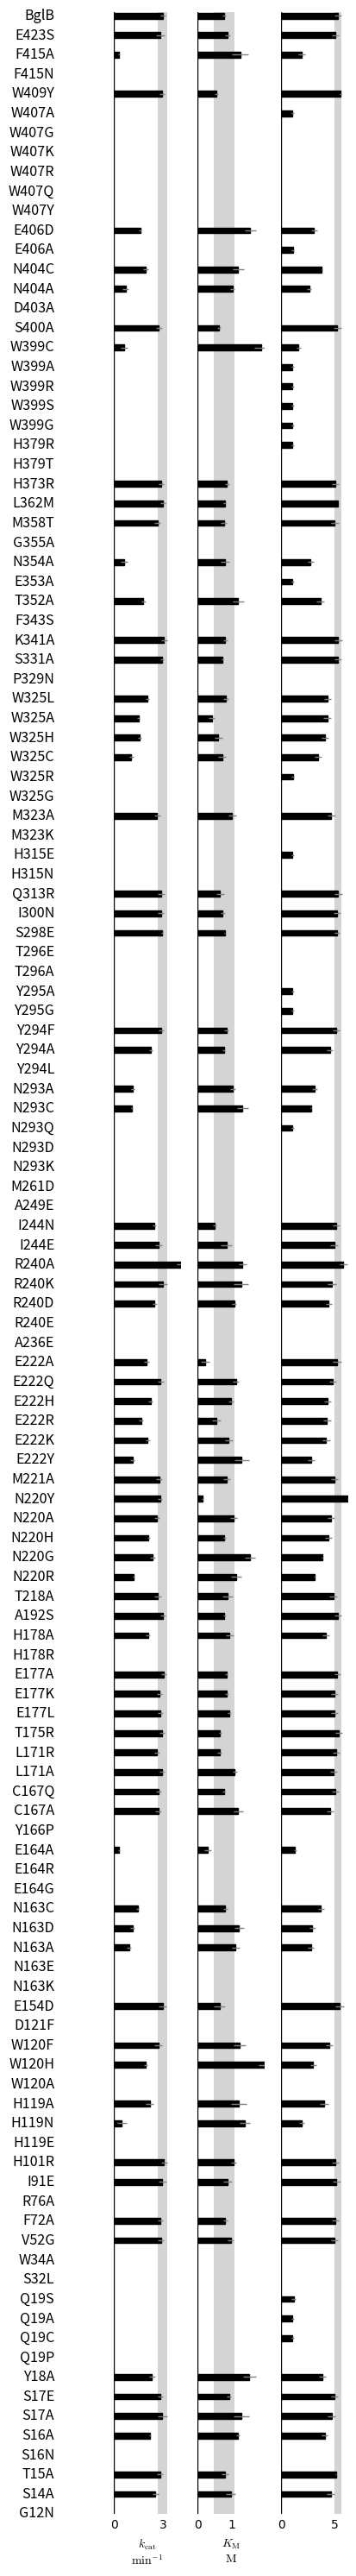

In [25]:
#http://faculty.washington.edu/stuve/log_error.pdf
#describes how to log error bars 

plt.figure( figsize=(5,30) ) 

bar_cols = [ 
    ( 'kcat', 'err_kcat', u'$k_{\mathrm{cat}}$\n$\mathrm{min}^{-1}$' ), 
    ( 'km', 'err_km', u'$K_{\mathrm{M}}$\n$\mathrm{M}$' ), 
    ( 'kcatkm', 'err_kcatkm', '' ), 
]

for i, ( col, err, fmt_str ) in enumerate( bar_cols ):
    plt.subplot( 1, 5, i+1 )
    x_vals = [ i for i in range( len( j ) ) ]
    plt.barh( x_vals, j[col], color='k', height=0.3, edgecolor=None, 
        xerr=0.434*j[err]/j[col],
        ecolor='gray', capsize=0, align='center' )
    plt.tick_params( length=0 ) 
    plt.yticks([])

    my_val = j.loc['BglB'][ col ]              
    plt.fill_between( [my_val - 0.3, my_val + 0.3], 128.2, color=(0,0,0,0.17), linewidth=0 ) 
    
    plt.xticks( [ 0, my_val.round() ] )
    plt.box( 0 ) 
    
    plt.plot( ( 0, 0 ), ( 0, 128.2 ), color='k' ) 
    plt.xlabel( fmt_str )  

for i, r in enumerate( j.index ):
    font = { 'horizontalalignment': 'right', 'fontsize': 13, 'fontname': 'Source Sans Pro', }
    plt.text( -21, i-.2, r, fontdict=font )

plt.subplots_adjust( wspace=0 )
plt.tight_layout()
#plt.savefig( 'bar_plot_out.png', dpi=600 ) 

# Statistical analysis of correlations between Tm, kcat, KM, kcat/KM, conservation, and expression in E. coli 

In [26]:
h.corr( method='pearson' )['tm'] # I love pandas

expression           NaN
tm              1.000000
kcat           -0.267999
km             -0.074541
kcatkm         -0.243263
sequence_pos    0.121660
conserved       0.356664
Name: tm, dtype: float64

In [27]:
h.corr( method='pearson' )['conserved'] # I love pandas

expression     -0.220287
tm              0.356664
kcat           -0.690307
km             -0.150938
kcatkm         -0.722870
sequence_pos    0.024341
conserved       1.000000
Name: conserved, dtype: float64

In [28]:
# all versus all 
h.corr( method='pearson' )[ [ 'tm', 'conserved' ] ]

,tm,conserved
expression,NaN,-0.220287
tm,1.000000,0.356664
kcat,-0.267999,-0.690307
km,-0.074541,-0.150938
kcatkm,-0.243263,-0.722870
sequence_pos,0.121660,0.024341
conserved,0.356664,1.000000


How are kinetic constants related to Tm?

In [53]:
plt.Axes.legend?

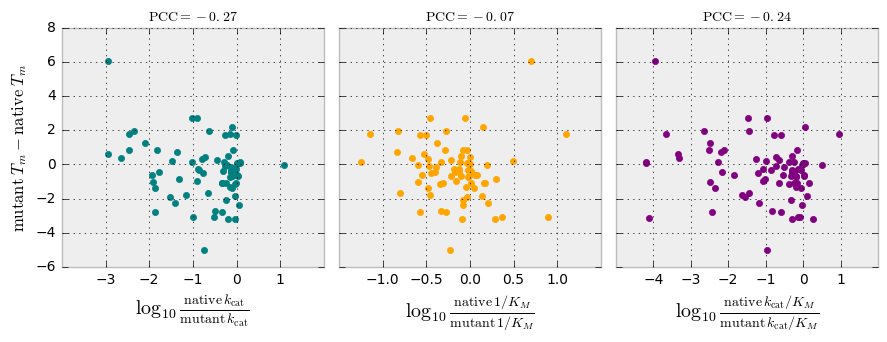

In [84]:
plt.style.use( 'bmh' )
fig, ax = plt.subplots( nrows=1, ncols=3, figsize=(9,3.6), sharey=True )

ax[0].scatter( h.kcat, h.tm, color='teal' )
ax[0].set_xlabel( r'$\mathrm{log}_{10} \, \frac{ \mathrm{native} \, k_\mathrm{{cat}} }{ \mathrm{mutant} \, k_\mathrm{{cat}} }$', fontsize='x-large' )
ax[0].set_ylabel( r'$\mathrm{mutant} \; T_m - \mathrm{native} \; T_m$' )
ax[0].set_xticks( ax[0].get_xticks()[1:-1] )
#ax[0].set_yticks( ( -6, -3, 0, 3, 6 ) )
ax[0].set_title( '$\mathrm{PCC} = -0.27$', fontsize='medium' )

ax[1].scatter( h.km, h.tm, color='orange' )
ax[1].set_xlabel( r'$\mathrm{log}_{10} \, \frac{ \mathrm{native} \, 1/K_M }{ \mathrm{mutant} \, 1/K_M }$', fontsize='x-large'  )
ax[1].set_xticks( ax[1].get_xticks()[1:-1] )
ax[1].set_title( '$\mathrm{PCC} = -0.07$' , fontsize='medium' )

ax[2].scatter( h.kcatkm, h.tm, color='purple' )
ax[2].set_xlabel( r'$\mathrm{log}_{10} \, \frac{ \mathrm{native} \, k_\mathrm{{cat}}/K_M }{ \mathrm{mutant} \, k_\mathrm{{cat}}/K_M }$', fontsize='x-large' )
ax[2].set_xticks( ax[2].get_xticks()[1:-1] )
ax[2].set_title( '$\mathrm{PCC} = -0.24$', fontsize='medium' )

fig.tight_layout()

How are the enzyme parameters we measured related to the percent conservation of the mutated residue? 

In [86]:
h.corr()[ 'conserved' ]

expression     -0.220287
tm              0.356664
kcat           -0.690307
km             -0.150938
kcatkm         -0.722870
sequence_pos    0.024341
conserved       1.000000
Name: conserved, dtype: float64

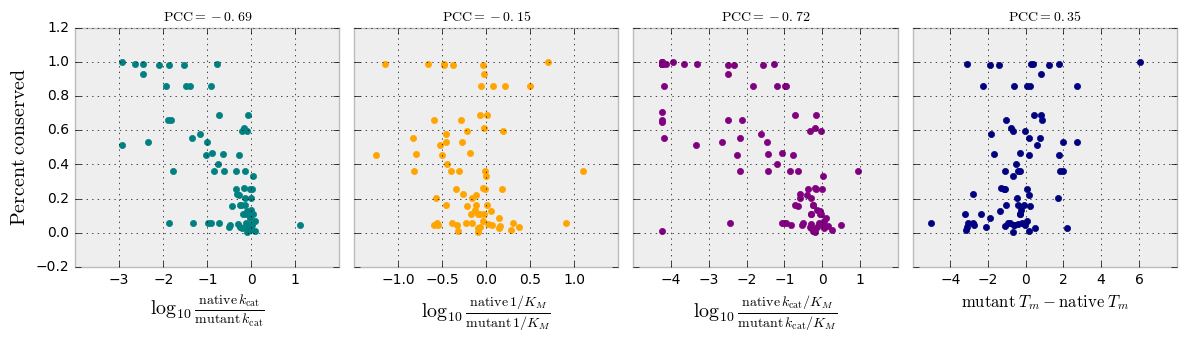

In [89]:
#plt.style.use( 'ggplot' )
fig, ax = plt.subplots( nrows=1, ncols=4, figsize=(12,3.6), sharey=True )

ax[0].scatter( h.kcat, h.conserved, color='teal' )
ax[0].set_xlabel( r'$\mathrm{log}_{10} \, \frac{ \mathrm{native} \, k_\mathrm{{cat}} }{ \mathrm{mutant} \, k_\mathrm{{cat}} }$', fontsize='x-large' )
ax[0].set_ylabel( '$\mathrm{Percent \; conserved}$', fontsize='x-large' )
ax[0].set_xticks( ax[0].get_xticks()[1:-1] )
ax[0].set_title( '$\mathrm{PCC} = -0.69$', fontsize='medium' )

ax[1].scatter( h.km, h.conserved, color='orange' )
ax[1].set_xlabel( r'$\mathrm{log}_{10} \, \frac{ \mathrm{native} \, 1/K_M }{ \mathrm{mutant} \, 1/K_M }$', fontsize='x-large' )
ax[1].set_xticks( ax[1].get_xticks()[1:-1] )
ax[1].set_title( '$\mathrm{PCC} = -0.15$', fontsize='medium' )

ax[2].scatter( h.kcatkm, h.conserved, color='purple' )
ax[2].set_xlabel( r'$\mathrm{log}_{10} \, \frac{ \mathrm{native} \, k_\mathrm{{cat}}/K_M }{ \mathrm{mutant} \, k_\mathrm{{cat}}/K_M }$', fontsize='x-large' )
ax[2].set_xticks( ax[2].get_xticks()[1:-1] )
ax[2].set_title( '$\mathrm{PCC} = -0.72$', fontsize='medium' )

ax[3].scatter( h.tm, h.conserved, color='navy' )
ax[3].set_xlabel( r'$\mathrm{mutant} \; T_m - \mathrm{native} \; T_m$' )
ax[3].set_xticks( ax[3].get_xticks()[1:-1] )
ax[3].set_title( '$\mathrm{PCC} = 0.35$', fontsize='medium' )

fig.tight_layout()

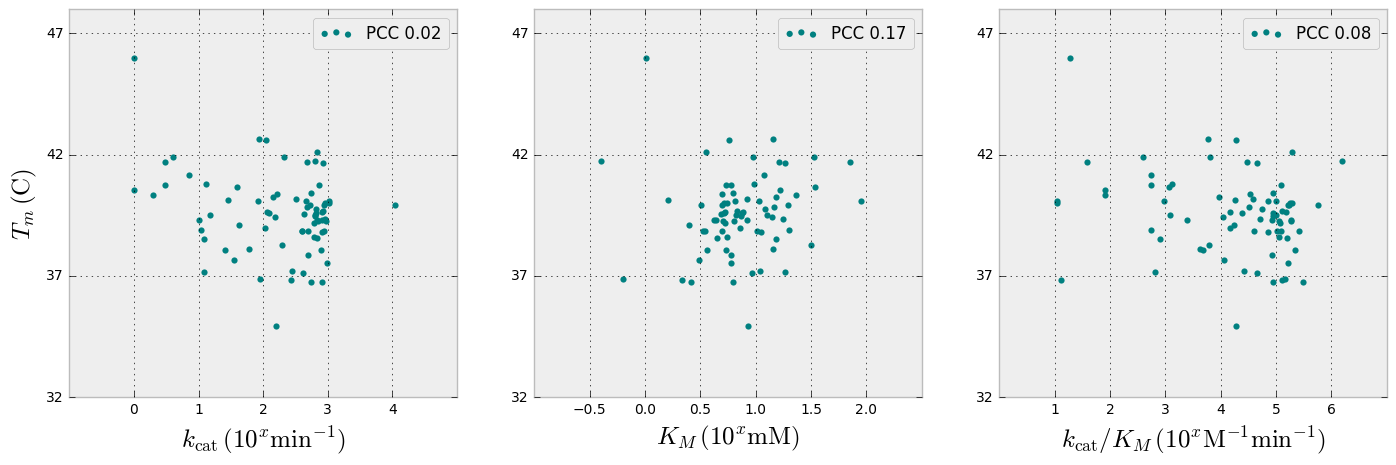

In [31]:

#plt.style.use( 'ggplot' )

constants = [ 
    ( 'kcat', 880, '$k_{\mathrm{cat}}\,(10^x \mathrm{min}^{-1})$', 0.02 ),
    ( 'km', 5.5, '$K_M\,(10^x \mathrm{mM})$', 0.17 ),
    ( 'kcatkm', 17400, '$k_{\mathrm{cat}}/K_M\,(10^x \mathrm{M}^{-1}\mathrm{min}^{-1})$', 0.08 ),
] 

plt.figure( figsize=( 17, 5 ) ) 

for idx, ( constant, native_value, fmt_str, pcc ) in enumerate( constants ):
    
    x = log10( df[ constant ] ) 
    y = df.tm
    my_log_value = log10( native_value ) 
    
    plt.subplot( 1, 3, idx+1 ) 
    plt.scatter( x, y, color='teal', lw=0 ) 
    
    my_x_ticks = plt.xticks()[0]
    plt.xticks( my_x_ticks[1:-1] )
    plt.yticks( [ 32, 37, 42, 47 ] )
    plt.legend( [ 'PCC {0:0.2f}'.format(pcc)])

    plt.xlabel( fmt_str, fontsize=18, fontname='Source Sans Pro' )
    if idx == 0:
        plt.ylabel( '$T_m\,(\mathrm{C})$', fontsize=18, fontname='Source Sans Pro' )
        
#plt.savefig( 'tm_versus_all.png', dpi=600 ) 

In [32]:
from scipy.stats import pearsonr

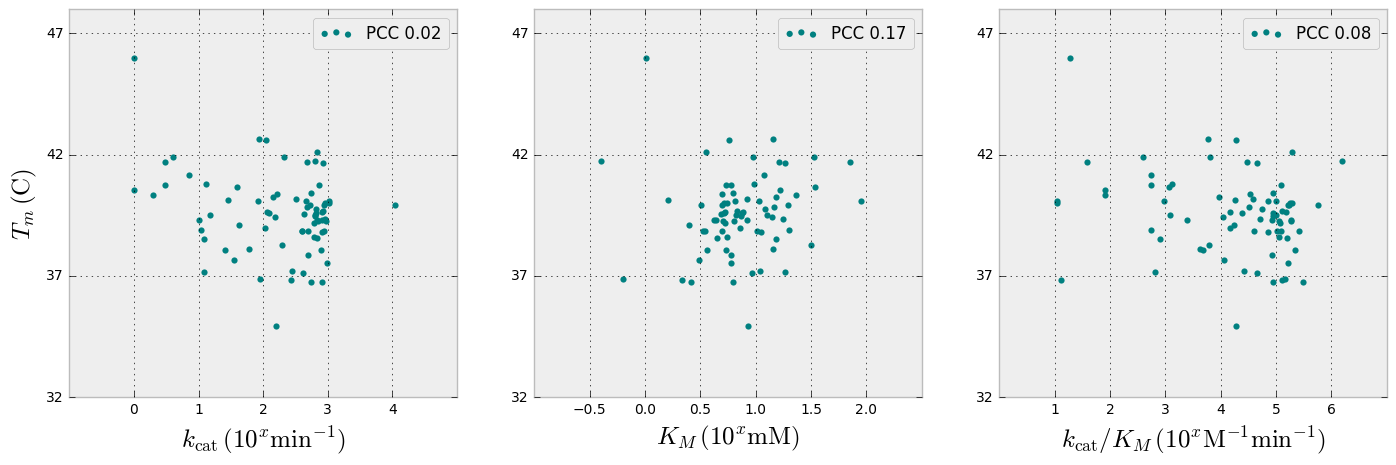

In [33]:
# kinetic constants versus tm 
#plt.style.use( 'ggplot' )

constants = [ 
    ( 'kcat', 880, '$k_{\mathrm{cat}}\,(10^x \mathrm{min}^{-1})$', 0.02 ),
    ( 'km', 5.5, '$K_M\,(10^x \mathrm{mM})$', 0.17 ),
    ( 'kcatkm', 17400, '$k_{\mathrm{cat}}/K_M\,(10^x \mathrm{M}^{-1}\mathrm{min}^{-1})$', 0.08 ),
] 

plt.figure( figsize=( 17, 5 ) ) 

for idx, ( constant, native_value, fmt_str, pcc ) in enumerate( constants ):
    
    x = log10( df[ constant ] ) 
    y = df.tm
    my_log_value = log10( native_value ) 
    
    plt.subplot( 1, 3, idx+1 ) 
    plt.scatter( x, y, color='teal', lw=0 ) 
    
    my_x_ticks = plt.xticks()[0]
    plt.xticks( my_x_ticks[1:-1] )
    plt.yticks( [ 32, 37, 42, 47 ] )
    plt.legend( [ 'PCC {0:0.2f}'.format(pcc)])

    plt.xlabel( fmt_str, fontsize=18, fontname='Source Sans Pro' )
    if idx == 0:
        plt.ylabel( '$T_m\,(\mathrm{C})$', fontsize=18, fontname='Source Sans Pro' )
        
#plt.savefig( 'tm_versus_all.png', dpi=600 ) 

In [34]:
# my_dict comes from a line at the very top 
# keys: sequence pos, values: percent conserved at this position
# in alignment of pfam ghf01 

df[ 'conserved' ] = df.sequence_pos.map( my_dict ) 

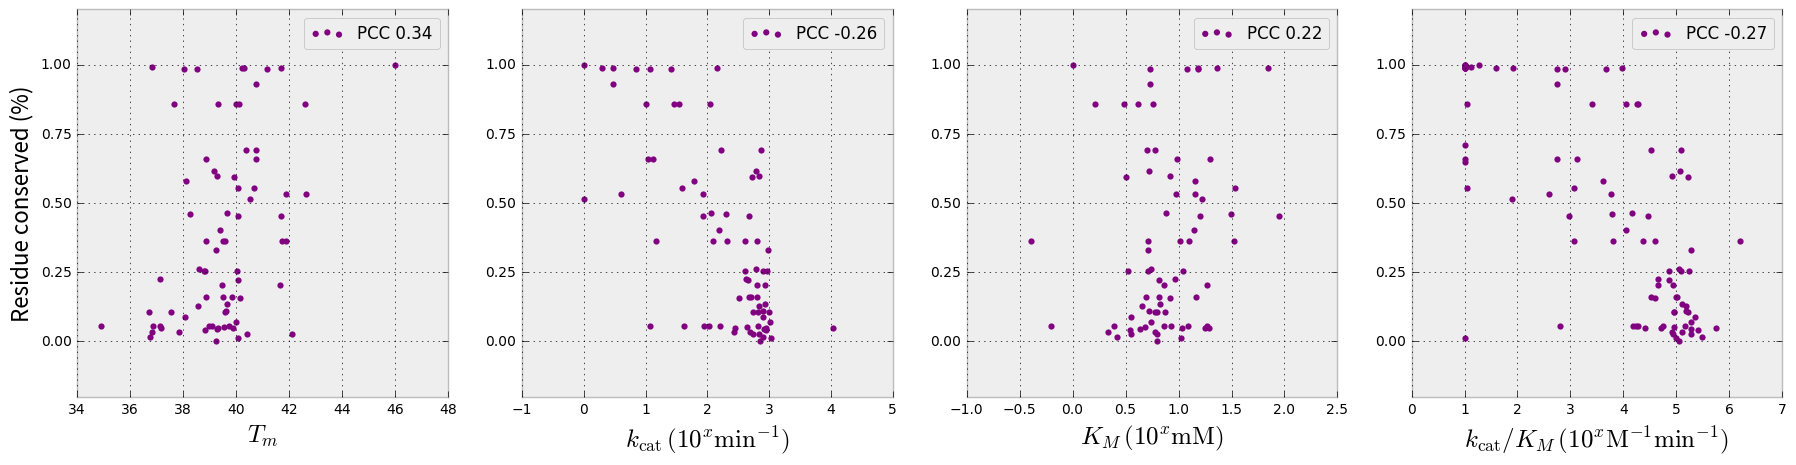

In [35]:
#plt.style.use( 'ggplot' )

constants = [ 
    ( 'tm', 39.99, '$T_m$', .34 ), 
    ( 'kcat', 880, '$k_{\mathrm{cat}}\,(10^x \mathrm{min}^{-1})$', -.26 ),
    ( 'km', 5.5, '$K_M\,(10^x \mathrm{mM})$', .22 ),
    ( 'kcatkm', 174000, '$k_{\mathrm{cat}}/K_M\,(10^x \mathrm{M}^{-1}\mathrm{min}^{-1})$', -.27 ),
] 

plt.figure( figsize=( 22, 5 ) ) 

for idx, ( constant, native_value, fmt_str, pcc ) in enumerate( constants ):
    
    if constant != 'tm':
        x = log10( df[ constant ] ) 
    else:
        x = df[ constant ]
    y = df.conserved
    
    plt.subplot( 1, 4, idx+1 ) 
    plt.scatter( x, y, color='purple', lw=0 )
    plt.legend( [ 'PCC {0:0.2f}'.format(pcc)] )
    
    #my_x_ticks = plt.xticks()[0]
    #plt.xticks( my_x_ticks[1:-1] )
    plt.yticks( [ 0, 0.25, .5, .75, 1 ] )

    plt.xlabel( fmt_str, fontsize=18, fontname='Source Sans Pro' )
    if idx == 0:
        plt.ylabel( 'Residue conserved (%)', fontsize=18, fontname='Source Sans Pro' )
        
#plt.savefig( 'tm_versus_all.png', dpi=600 ) 

In [36]:
# mutations that reveal tradeoffs
cc = [ 'kcat', 'km', 'kcatkm' ] 
collect = []
for c in cc:
    collect.append( [
            len( h[ ( h.tm < 0 ) & ( h[c] > 0 ) ] ), 
            len( h[ ( h.tm > 0 ) & ( h[c] < 0 ) ] ), 
        ] )
    
print( collect ) 

#plt.imshow( collect, interpolation='none', cmap='Greys' )
#plt.yticks( range( len( cc ) ), cc )

[[4, 24], [14, 22], [6, 25]]


In [37]:
h[ ( h.tm > 0 ) & ( h.kcat < 0 ) ] 

,expression,tm,kcat,km,kcatkm,sequence_pos,conserved
mutant,,,,,,,
S14A,1,0.23,-0.439333,-0.217484,-0.651460,14.0,0.157390
S17A,1,1.73,-0.016087,-0.567026,-0.577999,17.0,0.204678
H119N,1,0.38,-2.643453,-0.666892,-3.326735,119.0,0.986742
H119A,1,0.30,-0.789147,-0.480007,-1.263603,119.0,0.986742
W120H,1,0.16,-1.020203,-1.251297,-2.266038,120.0,0.452652
W120F,1,1.75,-0.270541,-0.507316,-0.773178,120.0,0.452652
N163A,1,1.23,-2.099385,-0.378398,-2.493915,163.0,0.982997
E164A,1,6.06,-2.944483,0.694649,-3.961796,164.0,1.000000
T218A,1,0.15,-0.277965,-0.114611,-0.387582,218.0,0.222785


In [38]:
h[ ( h.tm > 0 ) & ( h.km > 0 ) ] 

,expression,tm,kcat,km,kcatkm,sequence_pos,conserved
mutant,,,,,,,
E164A,1,6.06,-2.944483,0.694649,-3.961796,164.0,1.000000
N220Y,1,1.81,-0.146523,1.096910,0.955350,220.0,0.361850
Y294A,1,0.44,-0.724375,0.001741,-0.718627,294.0,0.689981
Q313R,1,2.18,-0.106263,0.145087,0.043595,313.0,0.026840
W325A,1,0.20,-1.482085,0.492144,-0.979453,325.0,0.856407


In [39]:
# single feature correlations

In [40]:
# machine learning results 

In [41]:
# data dump 

pandas.options.display.max_rows = 200

df[ [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'conserved' ] ]

,expression,tm,kcat,km,kcatkm,conserved
mutant,,,,,,
G12N,0,NaN,NaN,NaN,NaN,0.962179
S14A,1,40.16,320.0,8.25,38823.0,0.157390
T15A,1,39.17,614.0,5.30,115849.0,0.615834
S16N,0,NaN,NaN,NaN,NaN,0.402336
S16A,1,39.41,154.0,14.01,10997.0,0.402336
S17A,1,41.66,848.0,18.45,45978.0,0.204678
S17E,1,39.47,641.0,7.32,87596.0,0.204678
Y18A,1,38.26,197.0,31.55,6230.0,0.458846
Q19P,0,NaN,NaN,NaN,NaN,0.990285
